In [1]:
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt

c:\Users\maitp\anaconda3\envs\PYTHON_PROJECT_1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading up data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

In [3]:
# Cleaning up data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(
    lambda job_skill: ast.literal_eval(job_skill) if pd.notna(job_skill) else job_skill
)

In [4]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]
df_US = df[
    (df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")
].copy()
df_US.dropna(subset="salary_year_avg", inplace=True)

(0.0, 600000.0)

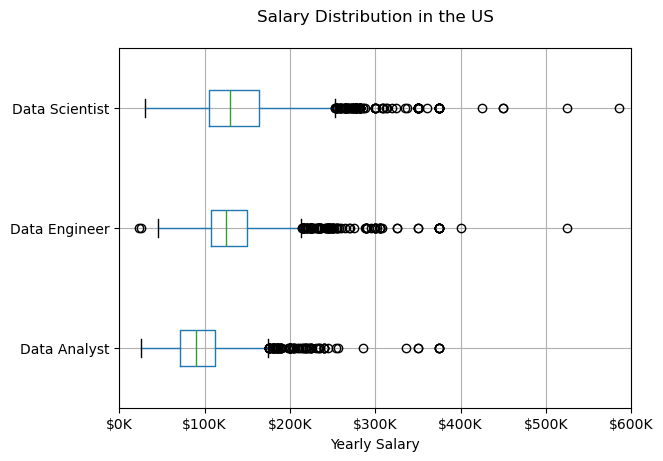

In [8]:
df_US.boxplot(
    "salary_year_avg", by="job_title_short", vert=False, xlabel="Yearly Salary"
)
plt.gca().set_title("")
plt.gca().set_ylabel("")
plt.suptitle("Salary Distribution in the US")
plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f"${int(x/1000):,}K")
)
plt.xlim(0, 600000)